Accuracy: 0.7887118193891103
Precision (weighted): 0.7681034264485216
Recall (weighted): 0.7887118193891103
F1-score (weighted): 0.7592182507848355

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.65      0.31      0.42      3700

    accuracy                           0.79     15060
   macro avg       0.73      0.63      0.64     15060
weighted avg       0.77      0.79      0.76     15060



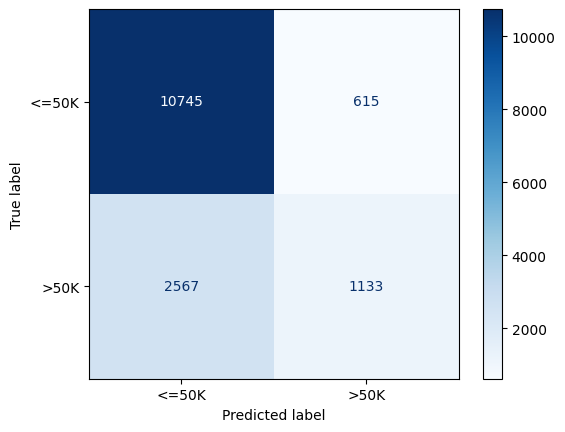

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)
import matplotlib.pyplot as plt


col_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", 
    "marital-status", "occupation", "relationship", "race", "sex", 
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

train = pd.read_csv("adult.data", header=None, names=col_names, na_values="?", skipinitialspace=True)
test = pd.read_csv("adult.test", header=0, names=col_names, na_values="?", skipinitialspace=True)

test["income"] = test["income"].str.replace(".", "", regex=False)

train = train.dropna()
test = test.dropna()

X_train = train.drop("income", axis=1)
y_train = train["income"]

X_test = test.drop("income", axis=1)
y_test = test["income"]

categorical = X_train.select_dtypes(include=["object"]).columns
numeric = X_train.select_dtypes(exclude=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical),  # force dense
        ("num", "passthrough", numeric),
    ]
)

model = Pipeline([
    ("preprocess", preprocessor),
    ("nb", GaussianNB())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (weighted):", precision_score(y_test, y_pred, average="weighted"))
print("Recall (weighted):", recall_score(y_test, y_pred, average="weighted"))
print("F1-score (weighted):", f1_score(y_test, y_pred, average="weighted"))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.show()
